In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vsl-hand-keypoints/224/N/N_00447.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00608.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00689.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00346.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00815.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00160.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00862.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00587.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00565.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00536.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00193.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00503.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00623.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00373.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00039.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00090.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00851.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00485.jpeg
/kaggle/input/vsl-hand-keypoints/224/N/N_00612.jpeg
/kaggle/inpu

KeyboardInterrupt: 

In [4]:
DATA_DIR = '/kaggle/input/vsl-hand-keypoints/224'

In [13]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# EDA

In [5]:
labels = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

In [6]:
print(f"Số lượng nhãn là: {len(labels)}")

Số lượng nhãn là: 25


In [8]:
data_counts = []
for label in labels:
    folder_path = os.path.join(DATA_DIR, label)
    num_images = len([f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    data_counts.append((label, num_images))

In [9]:
df = pd.DataFrame(data_counts, columns=["label", "count"])
print(df)

   label  count
0      A   1284
1      B   1587
2      C   1498
3      D    685
4      E    915
5      G   1475
6      H    914
7      I   1799
8      K    878
9      L   1583
10     M    913
11     N    915
12     O   1551
13     P   1509
14     Q   1867
15     R    911
16   Râu   1224
17     S    914
18     T    918
19     U   1514
20     V   1498
21     X    914
22     Y   1514
23    mũ    977
24     Đ    931


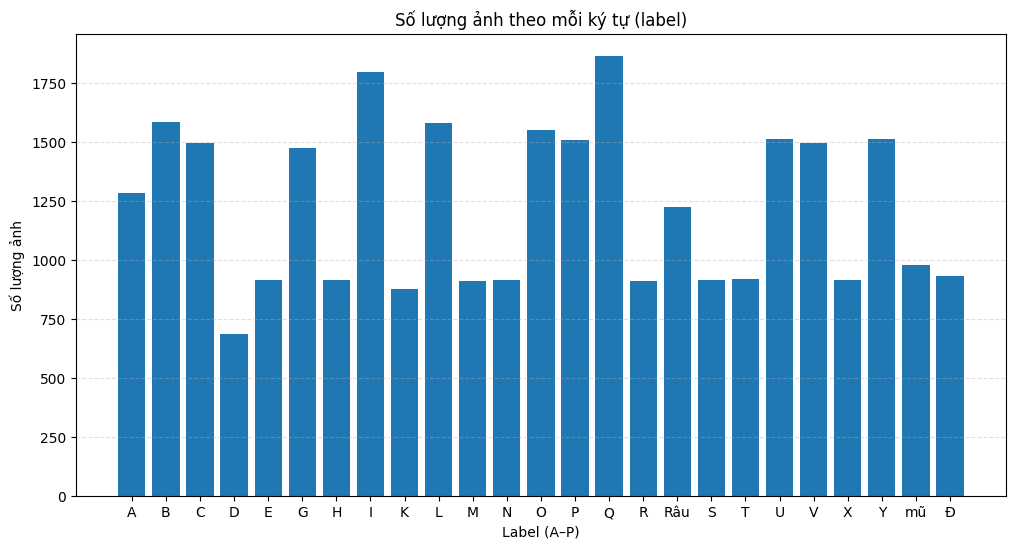

In [12]:
plt.figure(figsize=(12,6))
plt.bar(df["label"], df["count"])
plt.title("Số lượng ảnh theo mỗi ký tự (label)")
plt.xlabel("Label (A–P)")
plt.ylabel("Số lượng ảnh")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Tạo dữ liệu

In [15]:
SOURCE_DIR = "/kaggle/input/vsl-hand-keypoints/224"
TARGET_DIR = "/kaggle/working/vsl_224_subset"
NUM_SAMPLES = 500

In [16]:
os.makedirs(TARGET_DIR, exist_ok=True)

In [17]:
labels = sorted([d for d in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, d))])

for label in labels:
    src = os.path.join(SOURCE_DIR, label)
    dst = os.path.join(TARGET_DIR, label)
    os.makedirs(dst, exist_ok=True)

    # lấy danh sách ảnh
    images = [f for f in os.listdir(src) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # nếu ít hơn 500 thì lấy toàn bộ (tránh lỗi)
    select_count = min(len(images), NUM_SAMPLES)
    
    # random lấy 500 ảnh
    chosen = random.sample(images, select_count)

    # copy sang thư mục mới
    for img in chosen:
        shutil.copy(os.path.join(src, img), os.path.join(dst, img))

    print(f"Label {label}: lấy {select_count} ảnh.")

print("\nDone! Dataset subset được lưu tại:")
print(TARGET_DIR)

Label A: lấy 500 ảnh.
Label B: lấy 500 ảnh.
Label C: lấy 500 ảnh.
Label D: lấy 500 ảnh.
Label E: lấy 500 ảnh.
Label G: lấy 500 ảnh.
Label H: lấy 500 ảnh.
Label I: lấy 500 ảnh.
Label K: lấy 500 ảnh.
Label L: lấy 500 ảnh.
Label M: lấy 500 ảnh.
Label N: lấy 500 ảnh.
Label O: lấy 500 ảnh.
Label P: lấy 500 ảnh.
Label Q: lấy 500 ảnh.
Label R: lấy 500 ảnh.
Label Râu: lấy 500 ảnh.
Label S: lấy 500 ảnh.
Label T: lấy 500 ảnh.
Label U: lấy 500 ảnh.
Label V: lấy 500 ảnh.
Label X: lấy 500 ảnh.
Label Y: lấy 500 ảnh.
Label mũ: lấy 500 ảnh.
Label Đ: lấy 500 ảnh.

Done! Dataset subset được lưu tại:
/kaggle/working/vsl_224_subset


In [18]:
SOURCE_DIR = "/kaggle/working/vsl_224_subset"
ZIP_PATH = "/kaggle/working/vsl_224_subset"

# Tạo file vsl_224_subset.zip trong /kaggle/working
shutil.make_archive(ZIP_PATH, 'zip', SOURCE_DIR)

print("Done, saved at:", ZIP_PATH + ".zip")

Done, saved at: /kaggle/working/vsl_224_subset.zip
